### NutriClass: Food Classification Using Nutritional Data



In [1]:
pip install sklearn ## How to install Sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '##': Expected package name at the start of dependency specifier
    ##
    ^


## How to import all package

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn .preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [101]:
df = pd.read_csv('synthetic_food_dataset_imbalanced.csv')
df.head()                                                     ## how to get the main data of front part

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [102]:
df.tail(10)                       ## how to get the main data of back part

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
31690,380.079559,16.672805,21.366611,26.741402,6.034601,2.761006,743.043563,42.500628,75.734383,44.270540,188.173077,snack,fried,False,False,Burger
31691,215.697703,11.897630,7.720006,23.572151,3.347493,1.914580,312.867985,26.956967,69.970938,43.828335,143.241753,breakfast,baked,False,True,Sushi
31692,231.087043,3.284382,14.315792,25.904136,12.688396,1.157683,324.042037,24.402958,77.575723,33.971902,79.989128,breakfast,grilled,False,False,Donut
31693,216.569168,1.942983,16.665219,35.708466,16.569766,0.974600,284.355181,19.107926,78.211606,31.078879,74.403967,lunch,grilled,False,False,Donut
31694,184.263739,8.218216,7.986752,25.131123,3.880544,0.127148,341.616471,19.794689,62.516440,52.901714,133.661464,snack,grilled,False,True,Sushi
31695,103.937793,1.251053,0.452045,27.891970,14.836599,1.835365,2.326263,0.000000,53.690101,81.784216,120.293342,lunch,fried,True,True,Banana
31696,246.063812,10.269973,13.106895,36.416636,5.684908,1.571570,600.167326,20.839330,81.153823,41.760973,192.062481,lunch,raw,False,False,Pizza
31697,299.997105,12.431992,11.512833,33.808189,5.737315,2.901049,586.095363,28.956145,75.144055,37.981317,197.318164,breakfast,grilled,False,False,Pizza
31698,352.146284,9.170255,8.340631,39.261887,1.731604,0.027763,20.681808,7.559997,73.299415,48.435802,152.072098,dinner,grilled,False,False,Pasta
31699,203.952826,5.322650,13.419346,26.686660,14.645211,0.295026,62.468736,38.417093,57.987511,51.156165,113.912626,breakfast,grilled,False,True,Ice Cream


In [103]:
df.groupby('Food_Name')['Food_Name'].count() ## how to get the food name counting

Food_Name
Apple        1500
Banana       1200
Burger       5000
Donut        4500
Ice Cream    3000
Pasta        4000
Pizza        6000
Salad        1000
Steak        2000
Sushi        3500
Name: Food_Name, dtype: int64

In [104]:
df.shape              ## how to get the shape of data

(31700, 16)

In [105]:
null_values=(df.isnull().sum().sum()/len(df))*100            ## how to get the null percent value of data
null_values

13.012618296529968

In [106]:
df.isnull().sum()                                           ## how to find the null value of data

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [107]:
a = df.dropna()  ## how to drop the null value
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31325 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31325 non-null  object 
 12  Preparation_Method  31325 non-null  object 
 13  Is_Vegan            31325 non-null  bool   
 14  Is_Gluten_Free      31325 non-null  bool   
 15  Food_Name           31325 non-null  object 
dtypes: bool(2

In [108]:
a.duplicated().sum() ## how to know the dulicate value of data

65

In [109]:
a = a.drop_duplicates() ## how to drop the duplicate value

In [110]:
a.duplicated().sum() ## after deleting the duplicate value 

0

In [111]:
a.info() ## how to get the information of data

<class 'pandas.core.frame.DataFrame'>
Index: 31260 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31260 non-null  float64
 1   Protein             31260 non-null  float64
 2   Fat                 31260 non-null  float64
 3   Carbs               31260 non-null  float64
 4   Sugar               31260 non-null  float64
 5   Fiber               31260 non-null  float64
 6   Sodium              31260 non-null  float64
 7   Cholesterol         31260 non-null  float64
 8   Glycemic_Index      31260 non-null  float64
 9   Water_Content       31260 non-null  float64
 10  Serving_Size        31260 non-null  float64
 11  Meal_Type           31260 non-null  object 
 12  Preparation_Method  31260 non-null  object 
 13  Is_Vegan            31260 non-null  bool   
 14  Is_Gluten_Free      31260 non-null  bool   
 15  Food_Name           31260 non-null  object 
dtypes: bool(2

In [112]:
df.groupby(['Food_Name','Meal_Type'])['Is_Gluten_Free'].sum()

Food_Name  Meal_Type
Apple      breakfast    354
           dinner       363
           lunch        383
           snack        400
Banana     breakfast    311
           dinner       291
           lunch        308
           snack        290
Burger     breakfast      0
           dinner         0
           lunch          0
           snack          0
Donut      breakfast      0
           dinner         0
           lunch          0
           snack          0
Ice Cream  breakfast    737
           dinner       767
           lunch        752
           snack        744
Pasta      breakfast      0
           dinner         0
           lunch          0
           snack          0
Pizza      breakfast      0
           dinner         0
           lunch          0
           snack          0
Salad      breakfast    276
           dinner       236
           lunch        255
           snack        233
Steak      breakfast    477
           dinner       476
           lunch        529

In [113]:
df.groupby(['Food_Name','Meal_Type'])['Is_Vegan'].sum()

Food_Name  Meal_Type
Apple      breakfast    354
           dinner       363
           lunch        383
           snack        400
Banana     breakfast    311
           dinner       291
           lunch        308
           snack        290
Burger     breakfast      0
           dinner         0
           lunch          0
           snack          0
Donut      breakfast      0
           dinner         0
           lunch          0
           snack          0
Ice Cream  breakfast      0
           dinner         0
           lunch          0
           snack          0
Pasta      breakfast      0
           dinner         0
           lunch          0
           snack          0
Pizza      breakfast      0
           dinner         0
           lunch          0
           snack          0
Salad      breakfast    276
           dinner       236
           lunch        255
           snack        233
Steak      breakfast      0
           dinner         0
           lunch          0

In [114]:
df.groupby(['Food_Name','Preparation_Method'])['Is_Gluten_Free'].sum()

Food_Name  Preparation_Method
Apple      baked                 386
           fried                 364
           grilled               416
           raw                   334
Banana     baked                 305
           fried                 304
           grilled               277
           raw                   314
Burger     baked                   0
           fried                   0
           grilled                 0
           raw                     0
Donut      baked                   0
           fried                   0
           grilled                 0
           raw                     0
Ice Cream  baked                 786
           fried                 728
           grilled               729
           raw                   757
Pasta      baked                   0
           fried                   0
           grilled                 0
           raw                     0
Pizza      baked                   0
           fried                   0
        

In [115]:
df.groupby(['Food_Name','Preparation_Method'])['Is_Vegan'].sum()

Food_Name  Preparation_Method
Apple      baked                 386
           fried                 364
           grilled               416
           raw                   334
Banana     baked                 305
           fried                 304
           grilled               277
           raw                   314
Burger     baked                   0
           fried                   0
           grilled                 0
           raw                     0
Donut      baked                   0
           fried                   0
           grilled                 0
           raw                     0
Ice Cream  baked                   0
           fried                   0
           grilled                 0
           raw                     0
Pasta      baked                   0
           fried                   0
           grilled                 0
           raw                     0
Pizza      baked                   0
           fried                   0
        

In [116]:
a.groupby('Food_Name')['Calories'].count() ## how to catogaries the food_name of taking calories count

Food_Name
Apple        1471
Banana       1184
Burger       4923
Donut        4454
Ice Cream    2954
Pasta        3959
Pizza        5900
Salad         984
Steak        1981
Sushi        3450
Name: Calories, dtype: int64

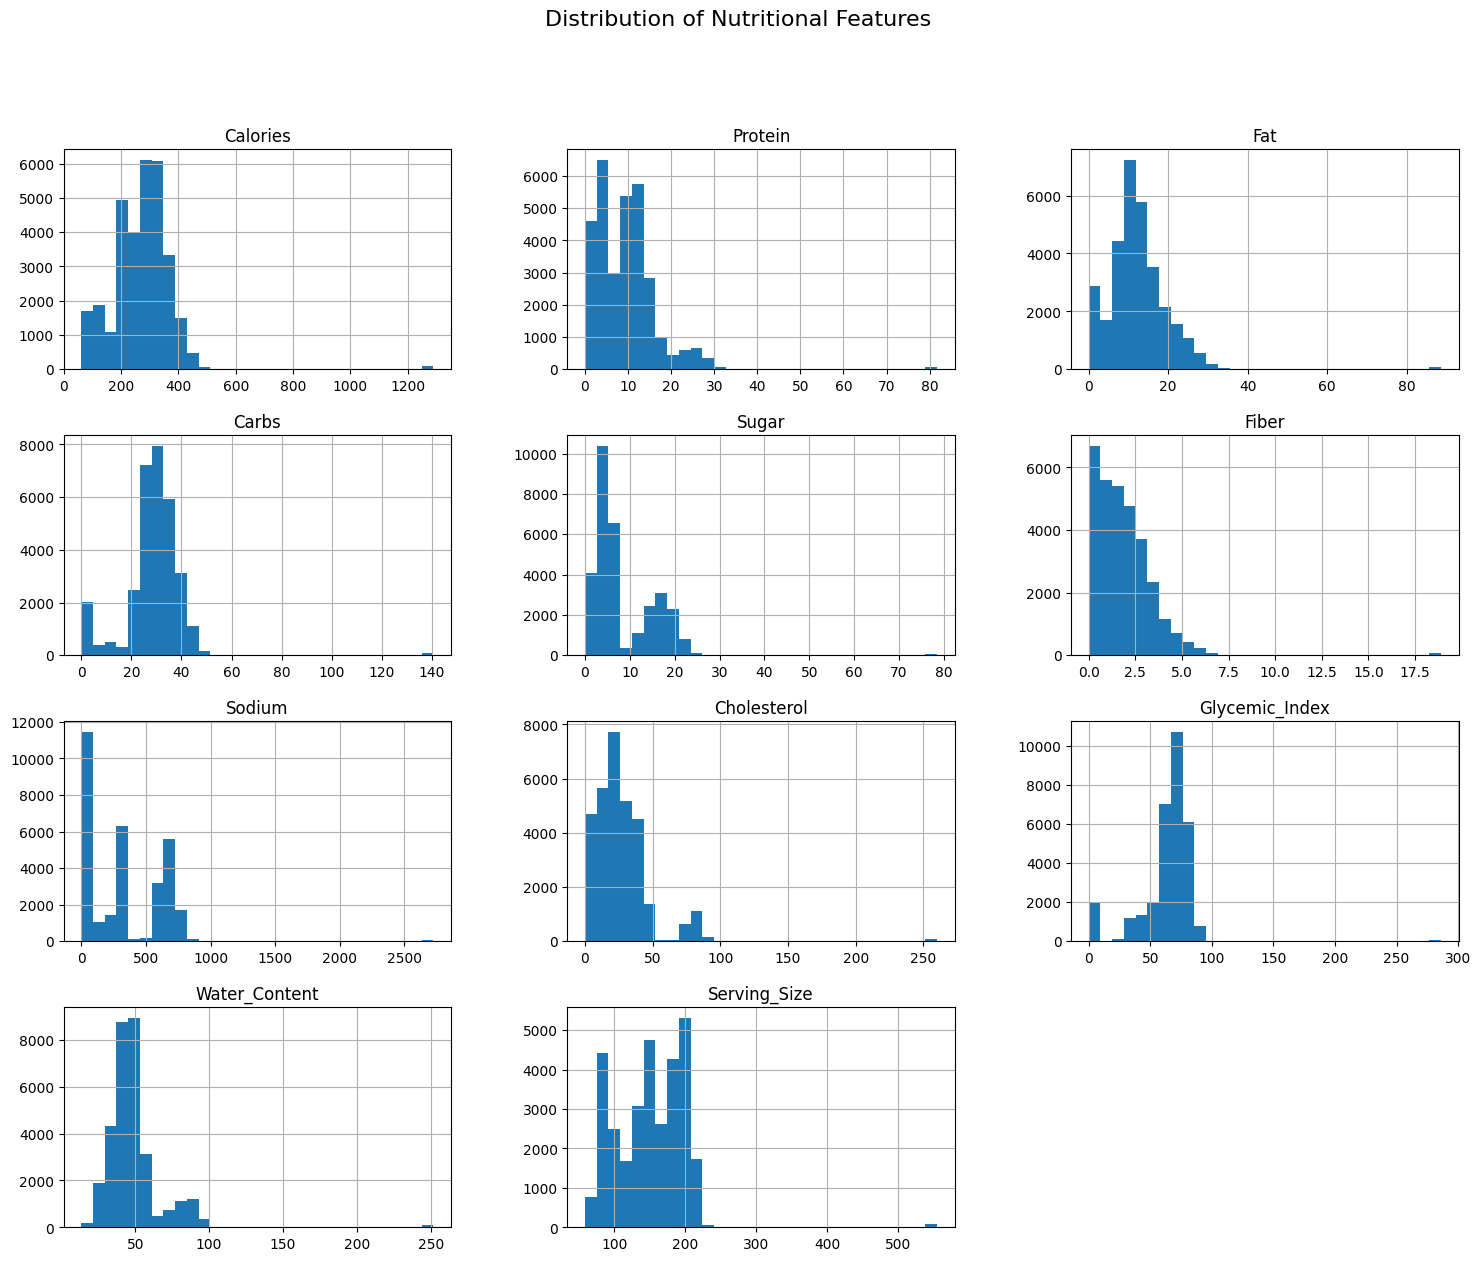

In [117]:
a.hist(bins=30, figsize=(18, 14))
plt.suptitle("Distribution of Nutritional Features", fontsize=16)
plt.show()

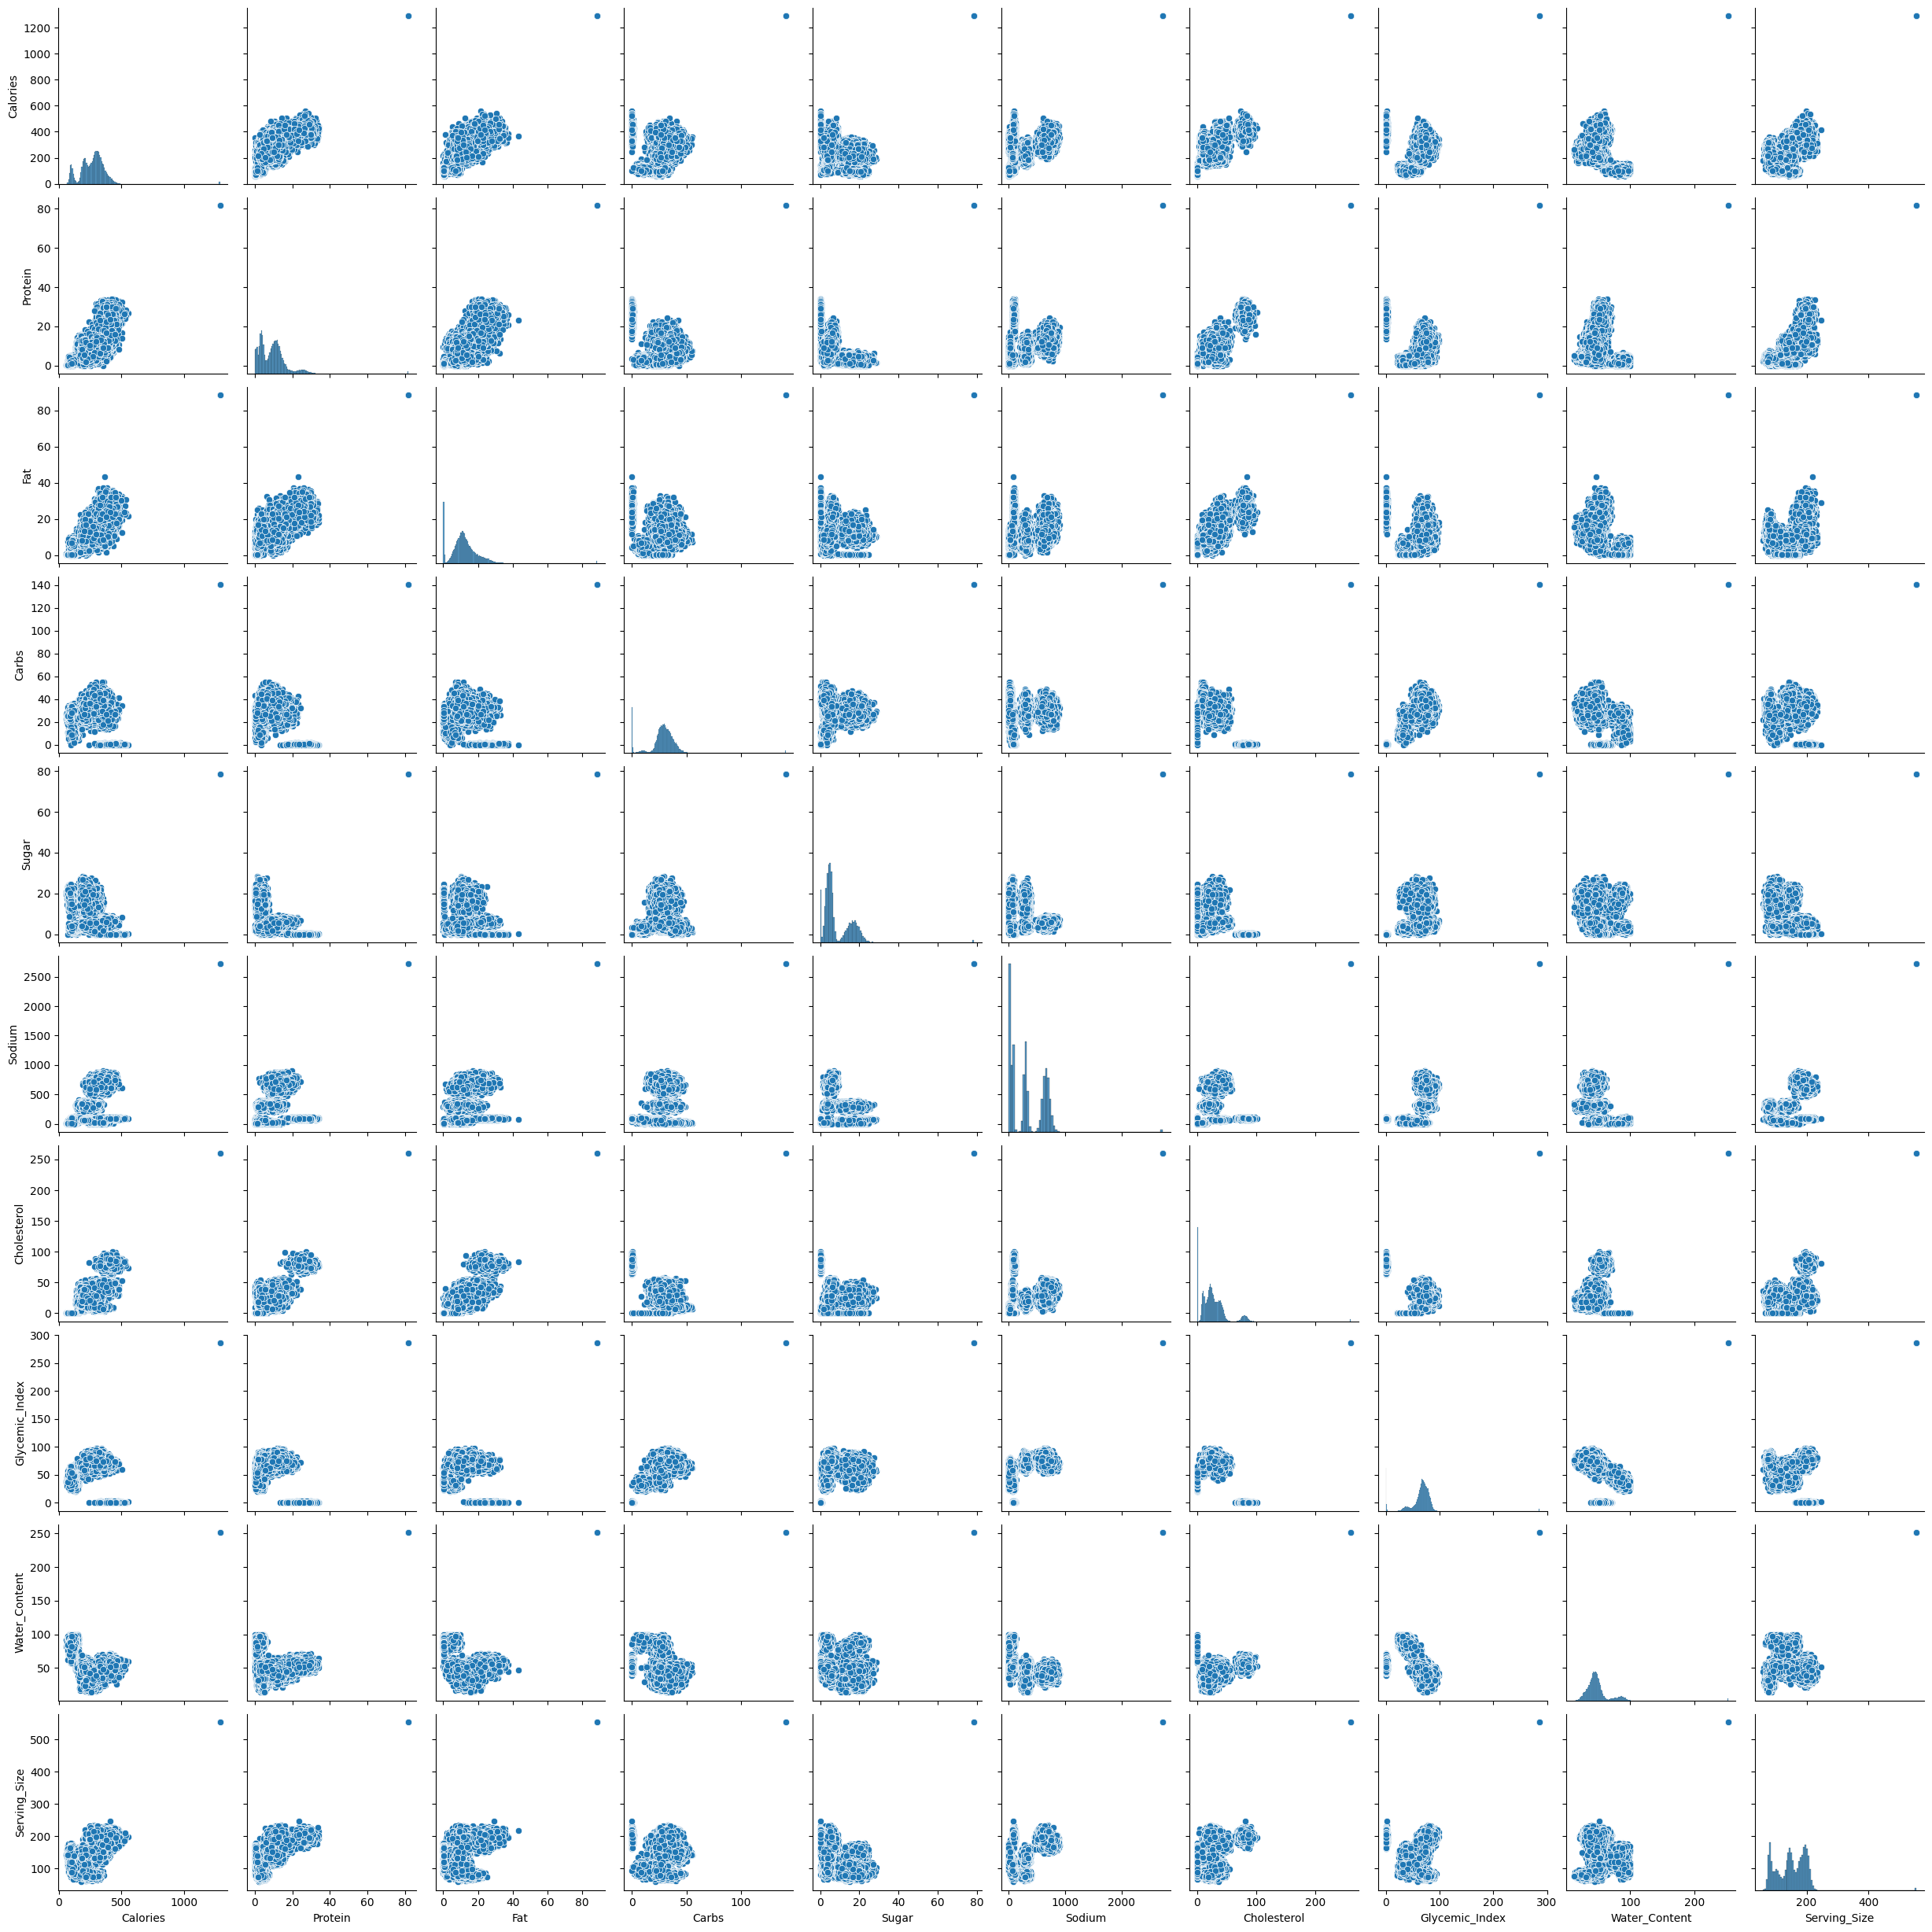

In [118]:

sns.pairplot(a[['Calories','Protein','Fat','Carbs','Sugar','Sodium',
            'Cholesterol','Glycemic_Index','Water_Content','Serving_Size']])
plt.show()

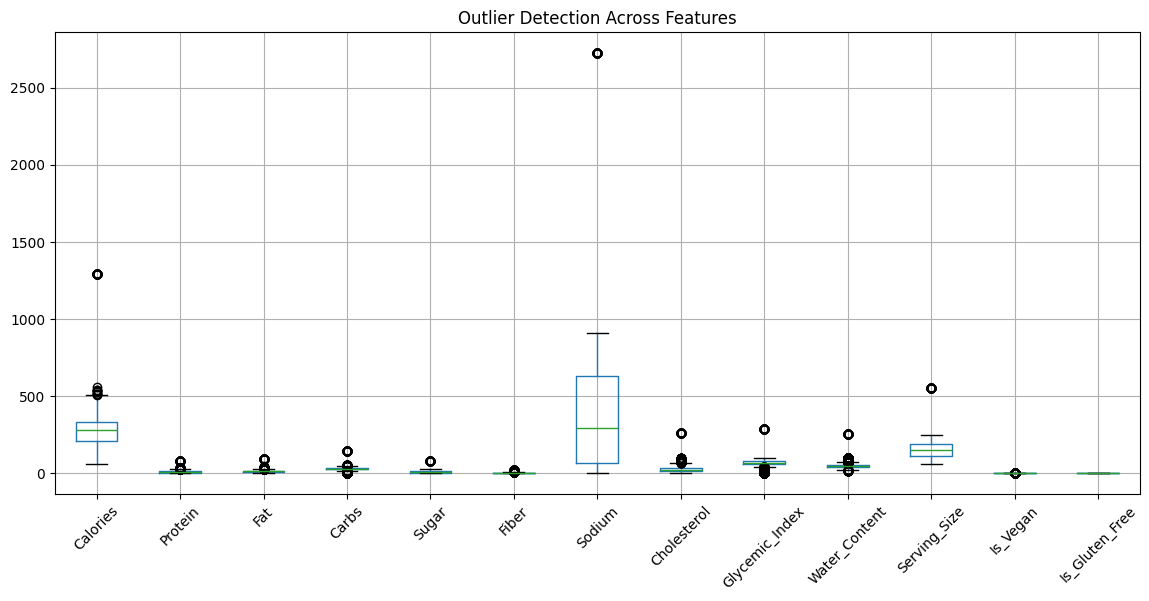

In [119]:
plt.figure(figsize=(14, 6))
a.boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection Across Features")
plt.show()

In [120]:
a.describe() ## how to get describe of data

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000
mean,271.264635,9.373595,12.318521,28.711059,8.398251,1.868721,330.420394,26.380091,63.752078,48.554776,149.891914
std,101.464986,7.324500,7.685144,11.612947,7.331201,1.603749,300.206402,22.608649,23.310749,18.580621,48.460190
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.226038,3.853169,8.237307,25.086253,3.735358,0.739206,62.850948,12.679588,59.965942,38.968730,109.402248
50%,281.551993,9.077022,11.563735,29.662508,5.491571,1.643046,292.187924,23.244097,68.423331,45.590667,151.574178
75%,329.557312,12.665367,15.783221,34.601958,14.375863,2.660902,630.578044,35.028095,75.414613,52.337777,188.955095
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


## Bar Plot of Distribution of Food Name for all Nutrient

Text(0.5, 1.0, 'Distribution of Serving_Size per Food Name')

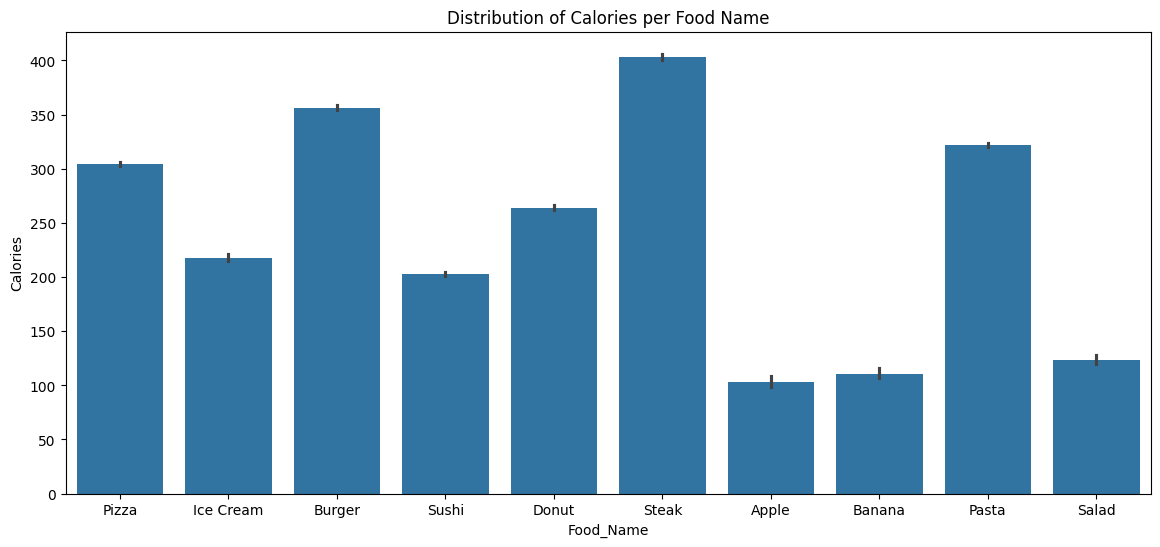

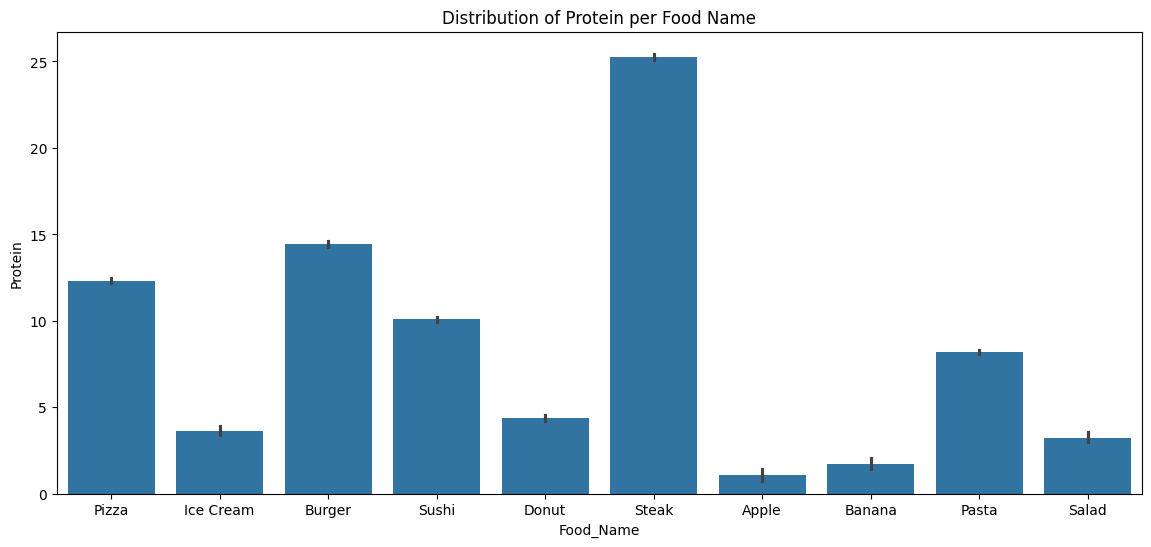

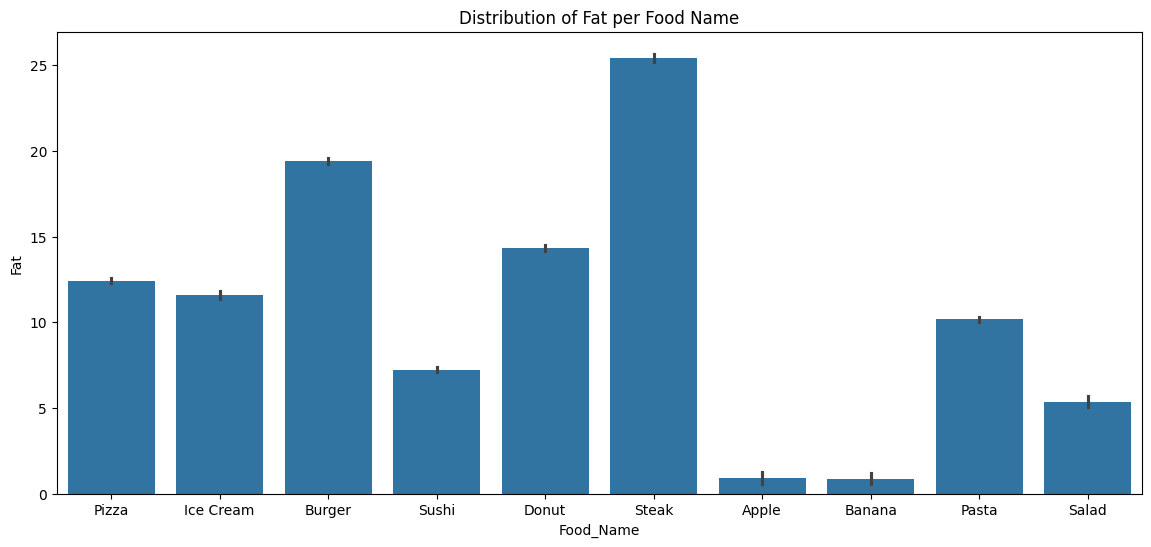

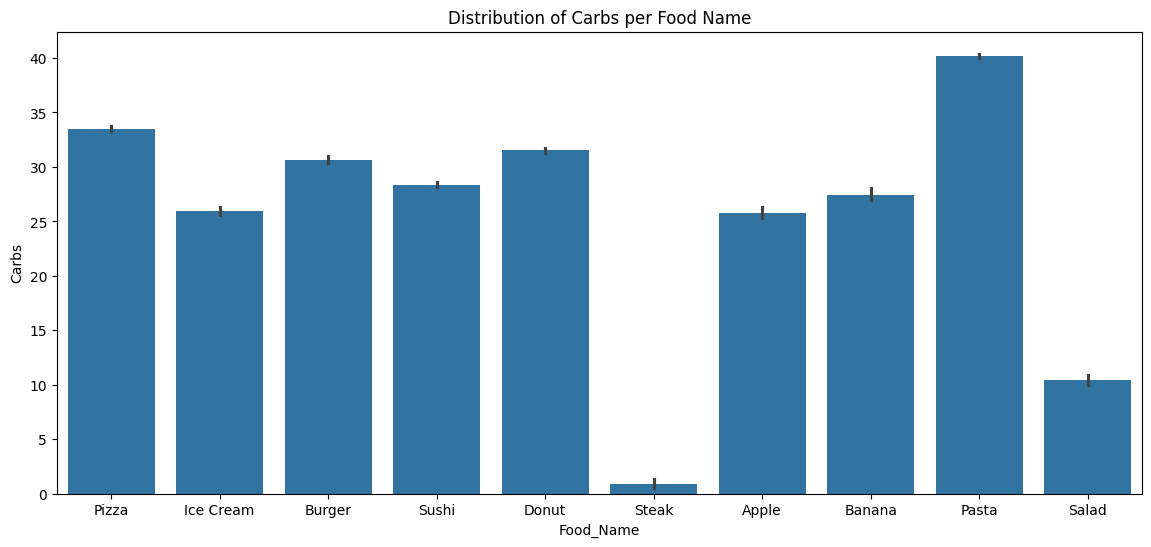

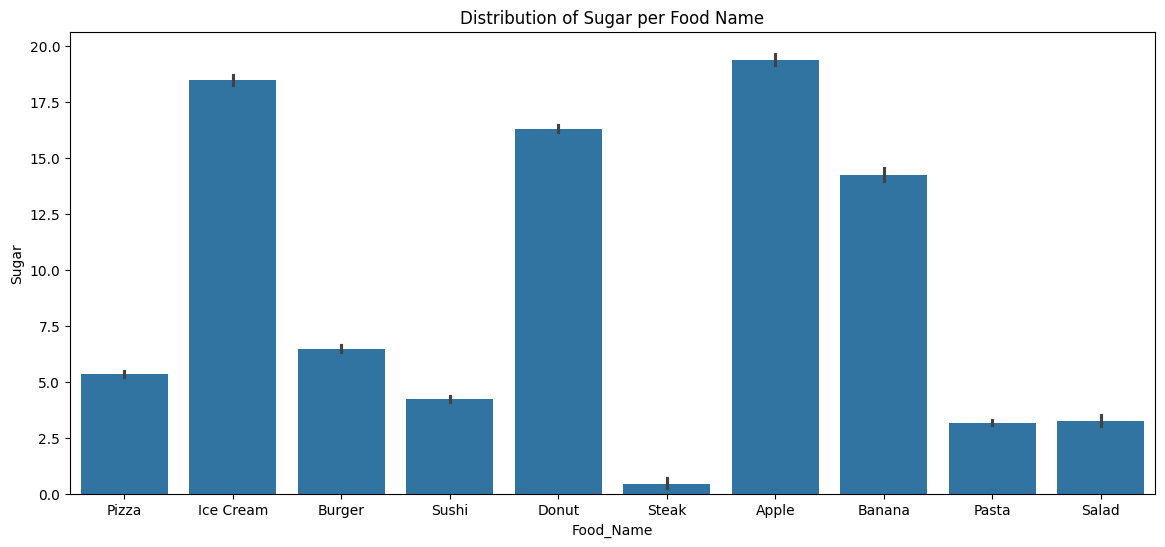

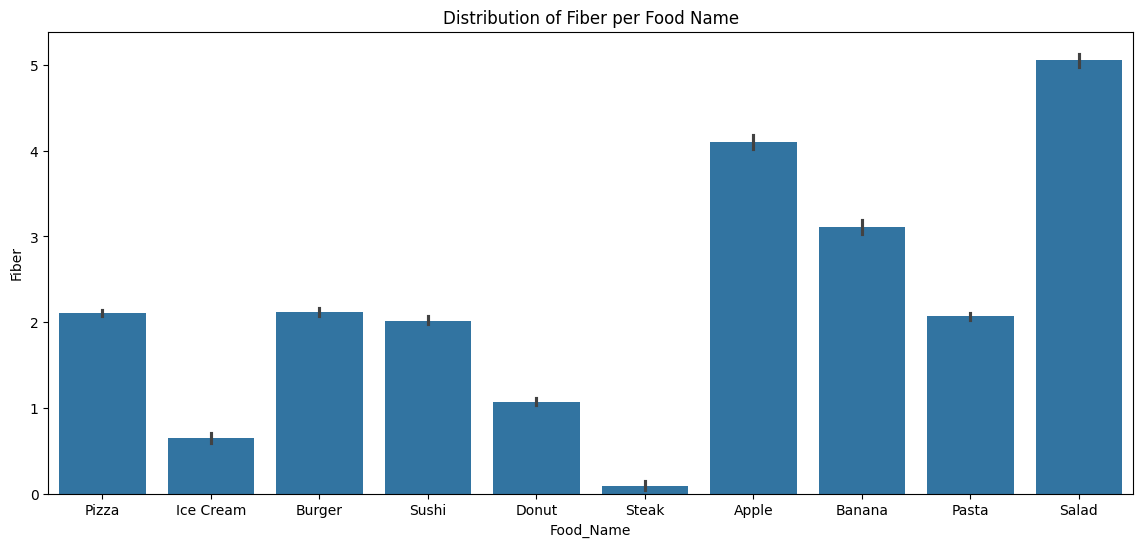

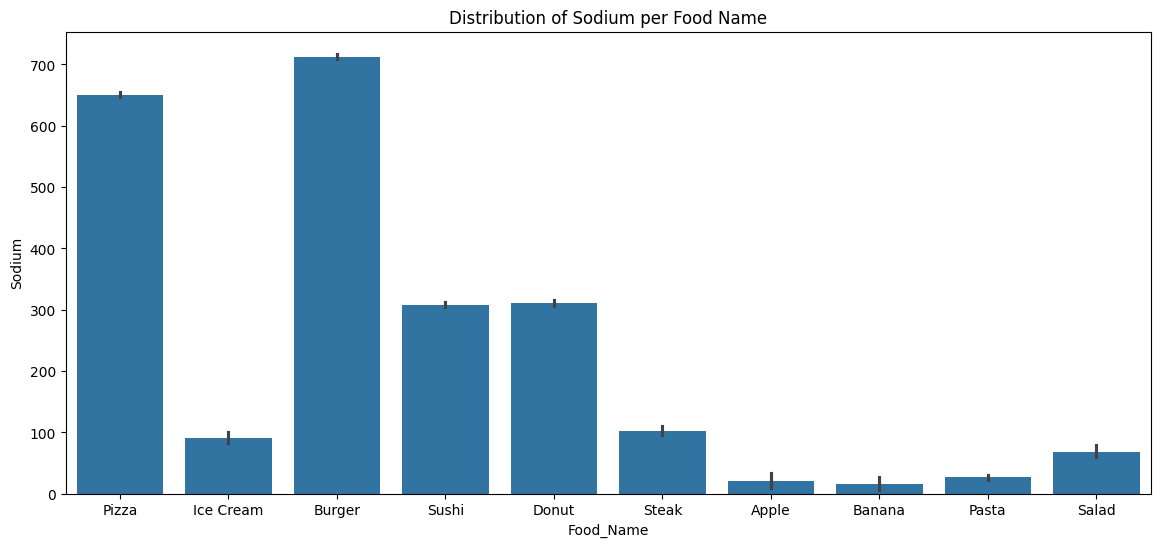

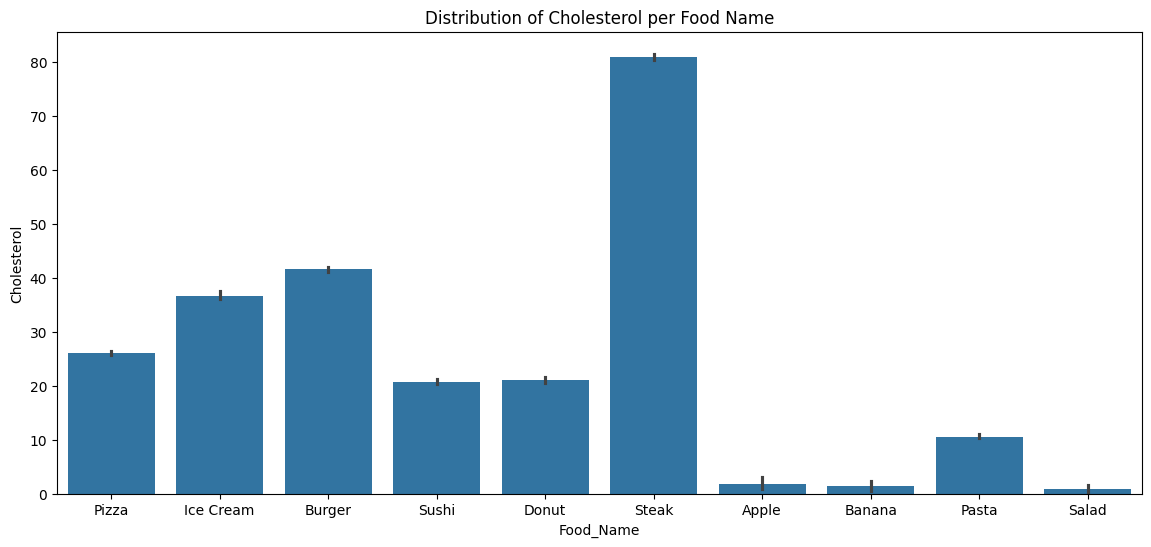

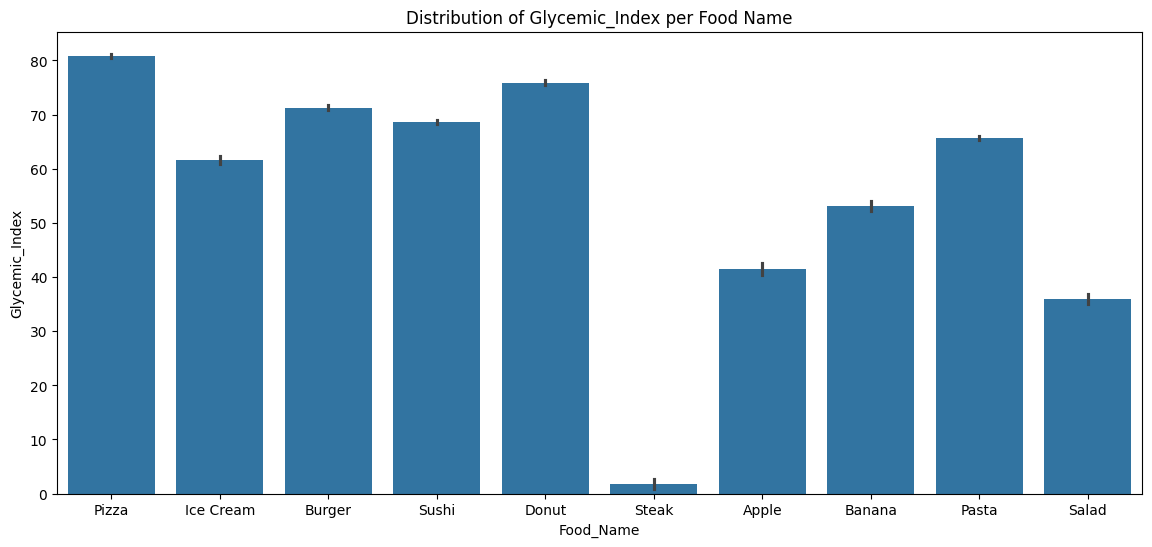

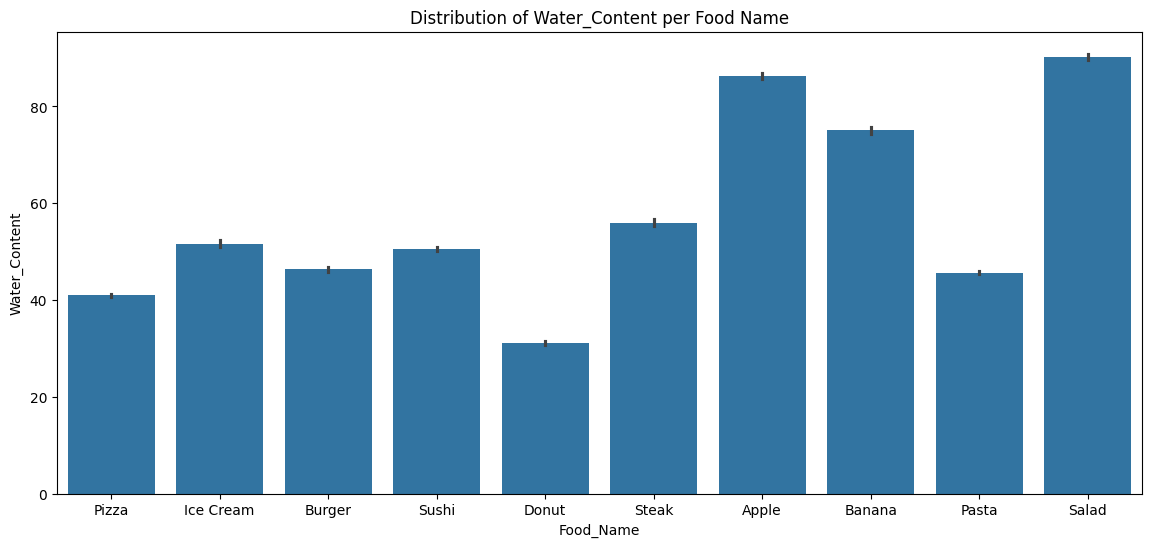

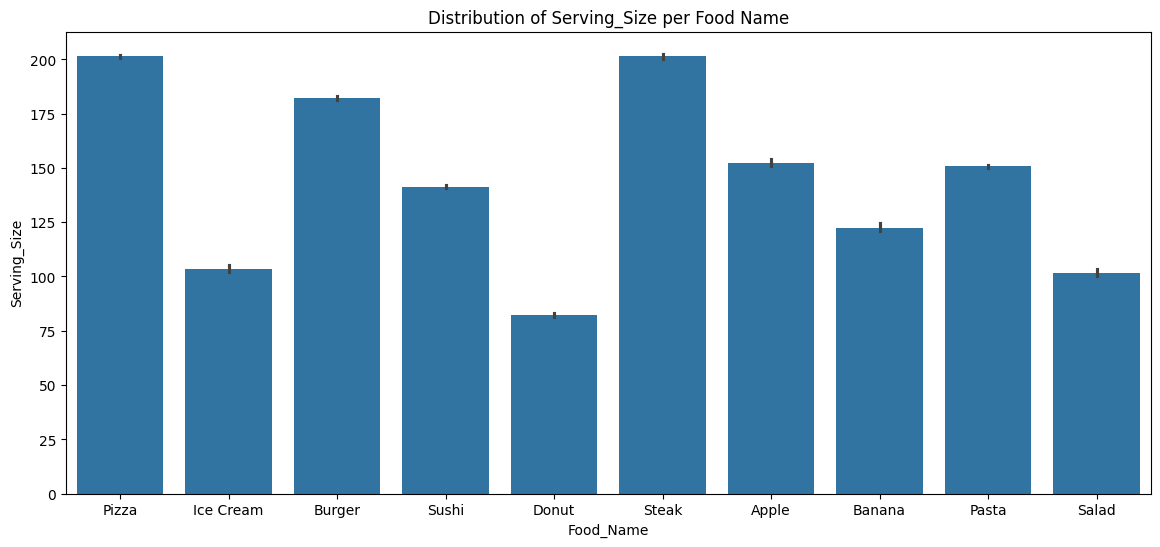

In [121]:
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Calories')
plt.title("Distribution of Calories per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Protein')
plt.title("Distribution of Protein per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Fat')
plt.title("Distribution of Fat per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Carbs')
plt.title("Distribution of Carbs per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Sugar')
plt.title("Distribution of Sugar per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Fiber')
plt.title("Distribution of Fiber per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Sodium')
plt.title("Distribution of Sodium per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Cholesterol')           #####   
plt.title("Distribution of Cholesterol per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Glycemic_Index')
plt.title("Distribution of Glycemic_Index per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Water_Content')
plt.title("Distribution of Water_Content per Food Name")
plt.figure(figsize=(14, 6))
sns.barplot(data = df, x = 'Food_Name',y = 'Serving_Size')
plt.title("Distribution of Serving_Size per Food Name")

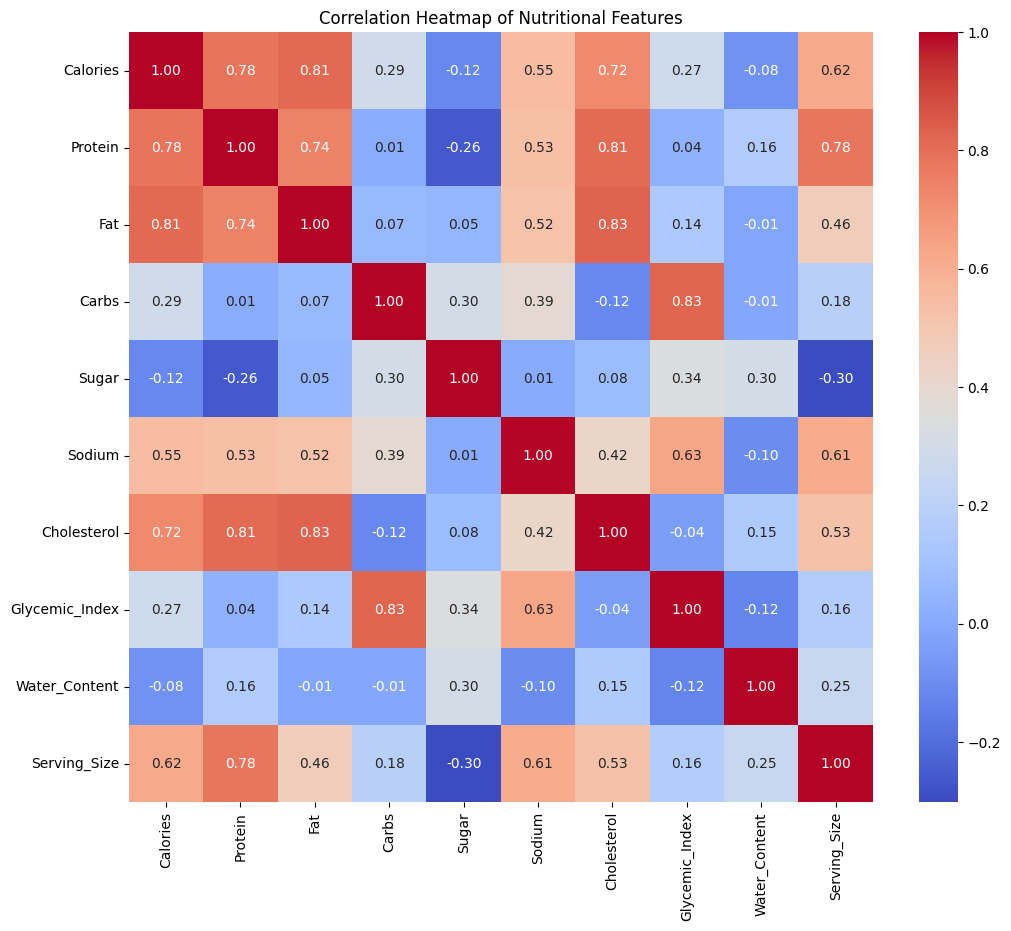

In [122]:
corr = a[['Calories','Protein','Fat','Carbs','Sugar','Sodium',
            'Cholesterol','Glycemic_Index','Water_Content','Serving_Size']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Nutritional Features")
plt.show()

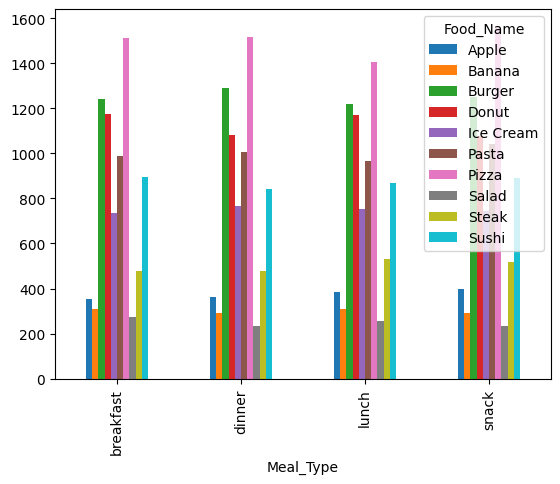

<Figure size 2000x1800 with 0 Axes>

<Figure size 2000x1800 with 0 Axes>

In [123]:
pd.crosstab(df['Meal_Type'],df['Food_Name']).plot(kind='bar')   # pizza is the favorte foood for the all time
plt.show()
plt.figure(figsize=(20, 18))

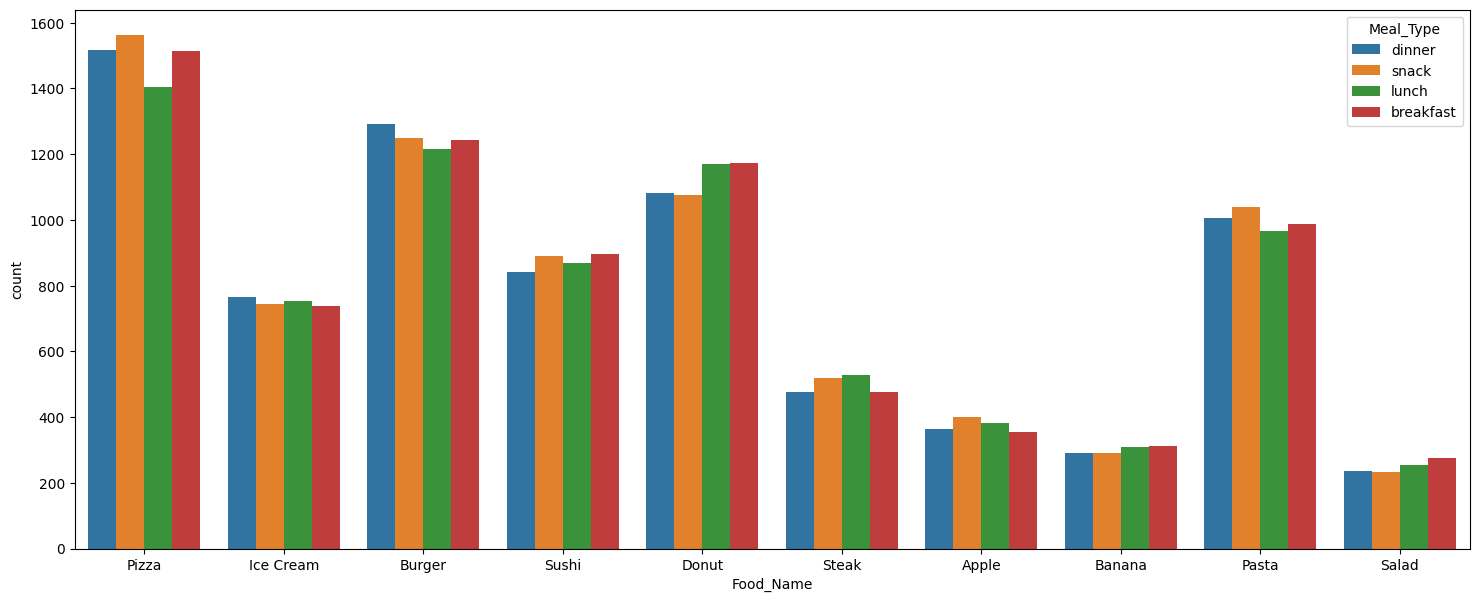

In [124]:
plt.figure(figsize=(18,7))
sns.countplot(x=df['Food_Name'],hue=df['Meal_Type'])     #######pizza is all time favorate in any time
plt.show()

In [125]:
num_cols = ['Calories','Protein','Fat','Carbs','Sugar','Sodium',
            'Cholesterol','Glycemic_Index','Water_Content','Serving_Size']

for col in num_cols:
    Q1 = a[col].quantile(0.25)
    Q3 = a[col].quantile(0.75)
    IQR = Q3 - Q1            #  how to reduce the outlayer of all column

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    a[col] = a[col].clip(lower, upper)


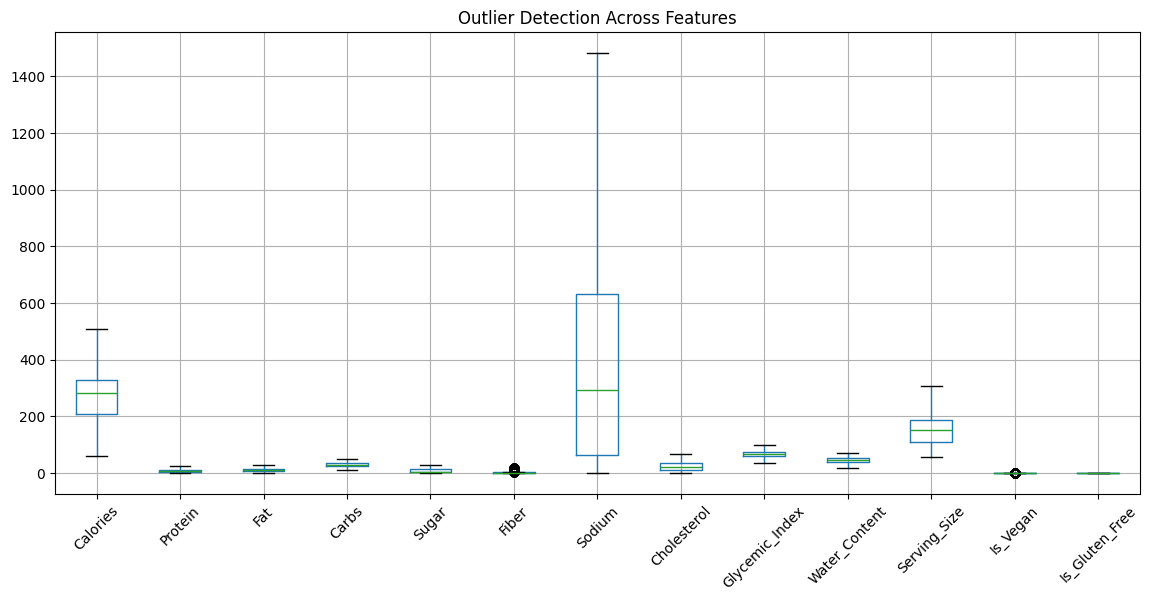

In [126]:
plt.figure(figsize=(14, 6))
a.boxplot()
plt.xticks(rotation=45)                       ### After removing the outlier of Nutrient 
plt.title("Outlier Detection Across Features")
plt.show()

In [127]:
a.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000,31260.000000
mean,269.159146,9.172014,12.100080,29.184591,8.268700,1.868721,327.082782,25.130517,65.677285,46.820201,149.229708
std,87.467070,6.195351,6.493280,8.291441,6.465230,1.603749,279.783217,17.188685,13.949289,12.366507,44.440654
min,60.786204,0.000000,0.000000,10.812696,0.000000,0.000000,0.000000,0.000000,36.792935,18.915159,58.575705
25%,210.226038,3.853169,8.237307,25.086253,3.735358,0.739206,62.850948,12.679588,59.965942,38.968730,109.402248
50%,281.551993,9.077022,11.563735,29.662508,5.491571,1.643046,292.187924,23.244097,68.423331,45.590667,151.574178
75%,329.557312,12.665367,15.783221,34.601958,14.375863,2.660902,630.578044,35.028095,75.414613,52.337777,188.955095
max,508.554224,25.883664,27.102093,48.875515,30.336619,18.891993,1482.168687,68.550856,98.587620,72.391348,308.284365


In [128]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR                              ##### we have count the outliers
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

for col in num_cols:
    print(col, count_outliers(a[col]))

Calories 0
Protein 0
Fat 0
Carbs 0
Sugar 0
Sodium 0
Cholesterol 0
Glycemic_Index 0
Water_Content 0
Serving_Size 0


In [129]:
a = a.drop(['Preparation_Method','Is_Vegan','Is_Gluten_Free','Meal_Type'],axis = 1) ## how to drop the column


In [130]:
a.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,Donut


In [131]:
 a['Food_Name']=a['Food_Name'].replace({'Apple':1,'Banana':2,'Burger':3,'Donut':4,'Ice Cream':5,'Pasta':6,'Pizza':7,'Salad':8,'Steak':9,'Sushi':10}) ## how to get the categories of  Food_Name in numeric form

C:\Users\kshan\AppData\Local\Temp\ipykernel_17716\3433726757.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  a['Food_Name']=a['Food_Name'].replace({'Apple':1,'Banana':2,'Burger':3,'Donut':4,'Ice Cream':5,'Pasta':6,'Pizza':7,'Salad':8,'Steak':9,'Sushi':10}) ## how to get the categories of  Food_Name in numeric form


In [132]:
a.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,7
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,5
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,3
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,10
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,4


In [133]:
a['Food_Name'] = a['Food_Name'].astype('int64') ## how to chage the dtypes of value of categoral column

In [134]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31260 entries, 0 to 31699
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Calories        31260 non-null  float64
 1   Protein         31260 non-null  float64
 2   Fat             31260 non-null  float64
 3   Carbs           31260 non-null  float64
 4   Sugar           31260 non-null  float64
 5   Fiber           31260 non-null  float64
 6   Sodium          31260 non-null  float64
 7   Cholesterol     31260 non-null  float64
 8   Glycemic_Index  31260 non-null  float64
 9   Water_Content   31260 non-null  float64
 10  Serving_Size    31260 non-null  float64
 11  Food_Name       31260 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 3.1 MB


In [135]:
a.head() #### Remove this line

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,7
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,5
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,3
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,10
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,4


In [136]:
x_scaled = a.drop(labels= "Food_Name" , axis = 1)
y_scaled = a["Food_Name"]                                 #### take Food_Name as a output and all column as a input
x_scaled.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474


In [137]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
import pandas as pd

## K Nearest Neighbour

In [138]:
x_scaled.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474


In [139]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

In [140]:
X_train.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
30943,306.600269,3.359068,8.071398,44.330160,1.630696,4.400180,6.273182,10.319664,70.898990,52.225289,134.297001
10010,292.389132,10.242136,9.287729,40.842676,3.532919,3.162746,35.535696,8.512471,73.279393,43.849960,155.455398
18369,338.170714,24.930470,27.102093,10.812696,0.131904,0.000000,78.970039,68.550856,36.792935,51.983970,193.054399
12977,286.709728,10.856848,11.236199,34.168695,4.942910,0.705245,632.154127,26.921114,88.491832,40.194532,187.091079
11842,174.504981,3.311439,11.538792,27.670235,22.472550,0.563085,61.630918,34.556251,58.205388,48.958889,117.212564


In [141]:
X_test.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
17530,392.479596,25.883664,26.177496,10.812696,0.000000,0.000000,86.589863,68.550856,36.792935,59.728172,193.604077
29312,335.780894,12.142404,21.472443,28.318687,5.484042,0.000000,715.154008,36.047930,78.168059,50.260182,190.107577
10052,260.969844,2.290705,12.831138,28.674181,14.788842,0.356545,341.586793,15.935392,72.113901,26.586927,80.071548
9951,190.753807,3.227909,12.944894,34.149691,15.138571,1.048754,299.414320,20.292457,64.700324,24.475477,76.565803
7058,341.863858,12.524798,12.328680,30.631740,4.063023,1.303164,629.894730,27.952797,82.868351,41.055235,186.646630


In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(x_scaled)

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [145]:
NNH.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'distance'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [146]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.991362763915547

In [147]:
y_test

17530    9
29312    3
10052    4
9951     4
7058     7
        ..
31482    3
12561    6
13386    3
13669    9
29480    7
Name: Food_Name, Length: 9378, dtype: int64

In [148]:
predicted_labels = NNH.predict(X_test) ## 
predicted_labels

array([9, 3, 4, ..., 3, 9, 7], dtype=int64)

Confusion Matrix


<Axes: >

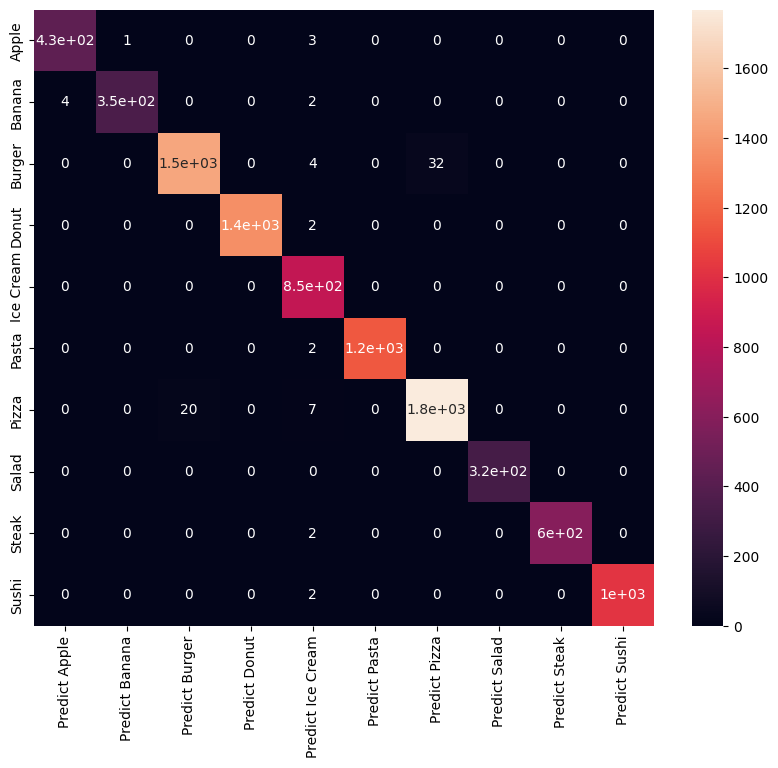

In [149]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1,2,3,4,5,6,7,8,9,10])

df_cm = pd.DataFrame(cm, index = [i for i in ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']],
                  columns = [i for i in ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi']])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

## Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [151]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9978521158943424
0.9886969503092343


In [152]:
from sklearn.tree import export_graphviz

train_char_label = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [153]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


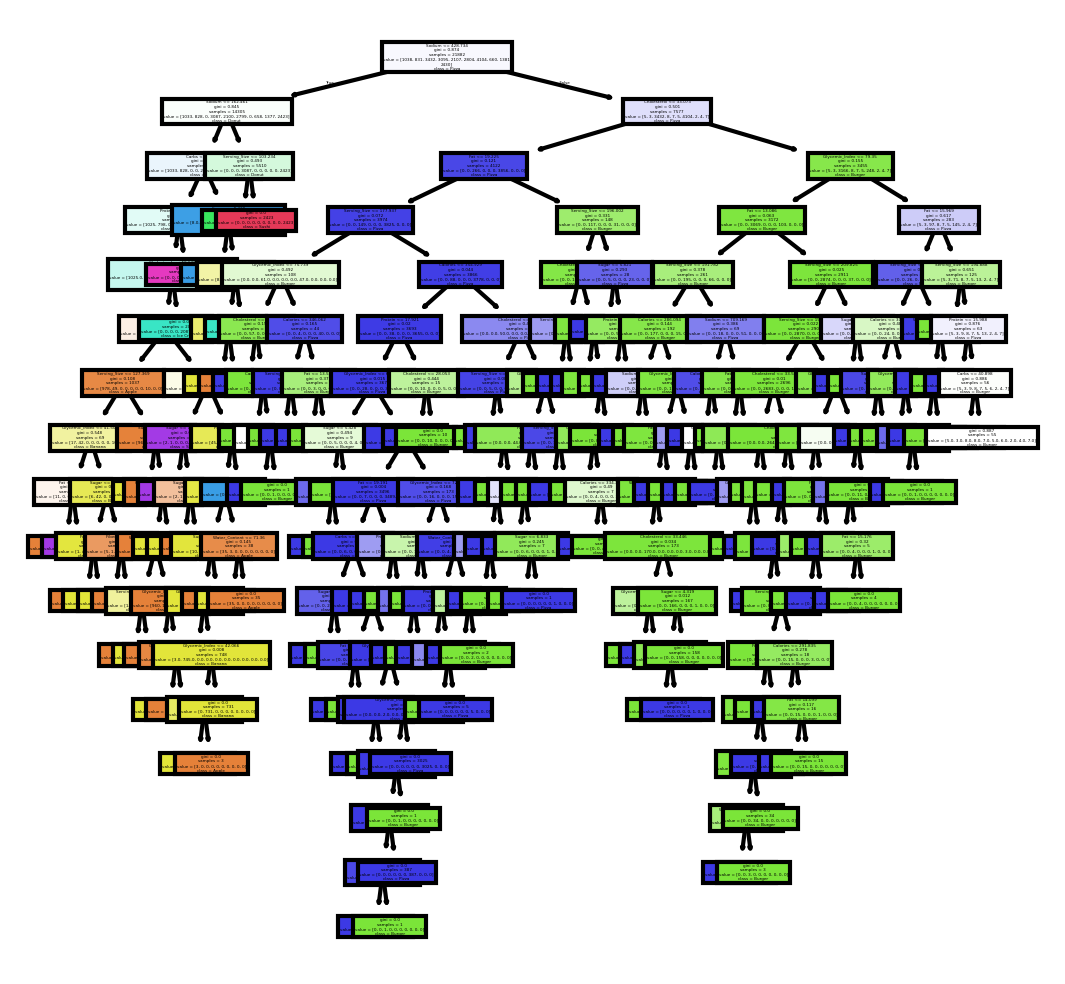

In [154]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [155]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.7988757883191664
0.7932394966943911


In [156]:
train_char_label = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

system command returning error: 1


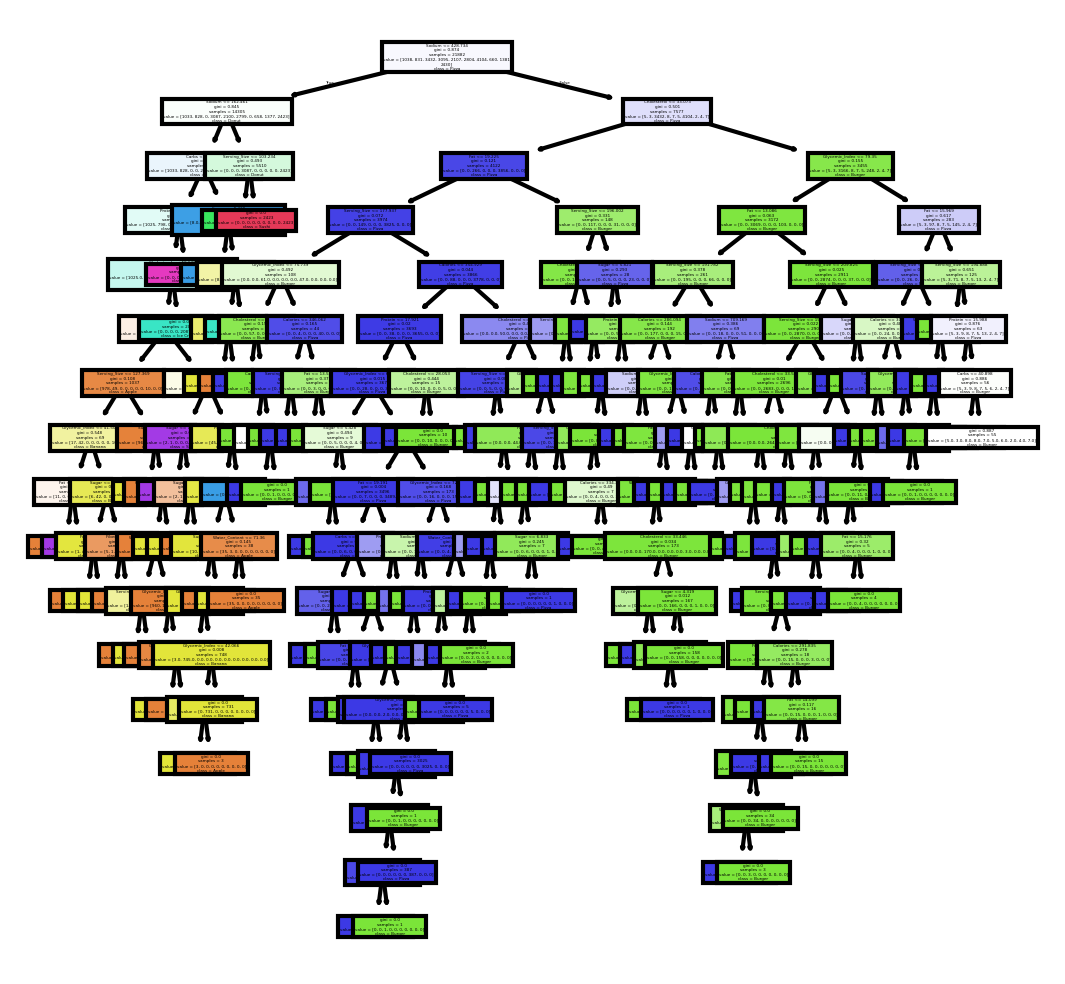

In [157]:
fn = list(X_train)
cn = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [158]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                     Imp
Calories        0.000000
Protein         0.000000
Fat             0.011828
Carbs           0.161851
Sugar           0.000000
Fiber           0.000000
Sodium          0.413896
Cholesterol     0.202153
Glycemic_Index  0.011843
Water_Content   0.000000
Serving_Size    0.198429


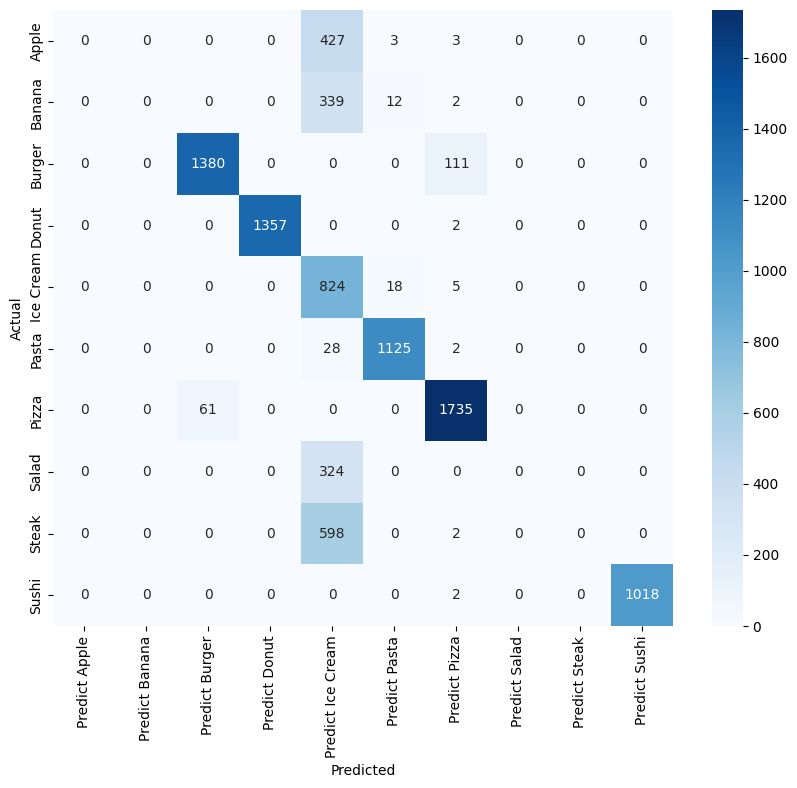

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [1,2,3,4,5,6,7,8,9,10]

y_predict = dTreeR.predict(X_test)

cm = confusion_matrix(y_test, y_predict, labels=labels)

df_cm = pd.DataFrame(cm, index = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi'],
                  columns = ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi'])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [62]:
############################

## Gradient Boosting Classifier


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 60,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.9946683727873747


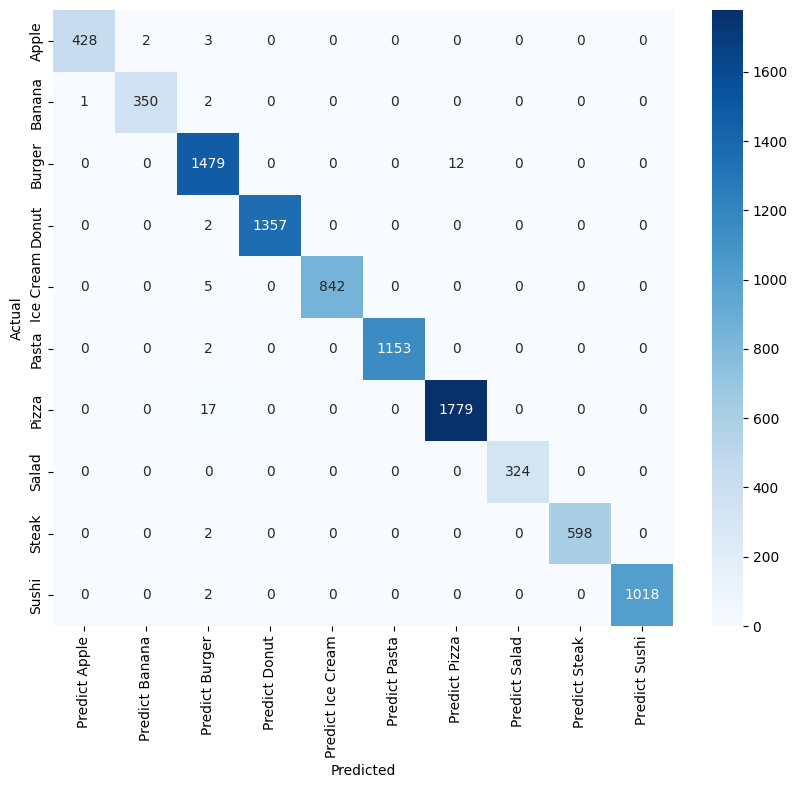

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [1,2,3,4,5,6,7,8,9,10]

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm = confusion_matrix(y_test, y_predict, labels=labels)

df_cm = pd.DataFrame(
    cm, index = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi'],
                  columns = ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi'])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [65]:
##########################################

## Random Forest Classifier

In [160]:

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 40, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9937086798891022


<Axes: >

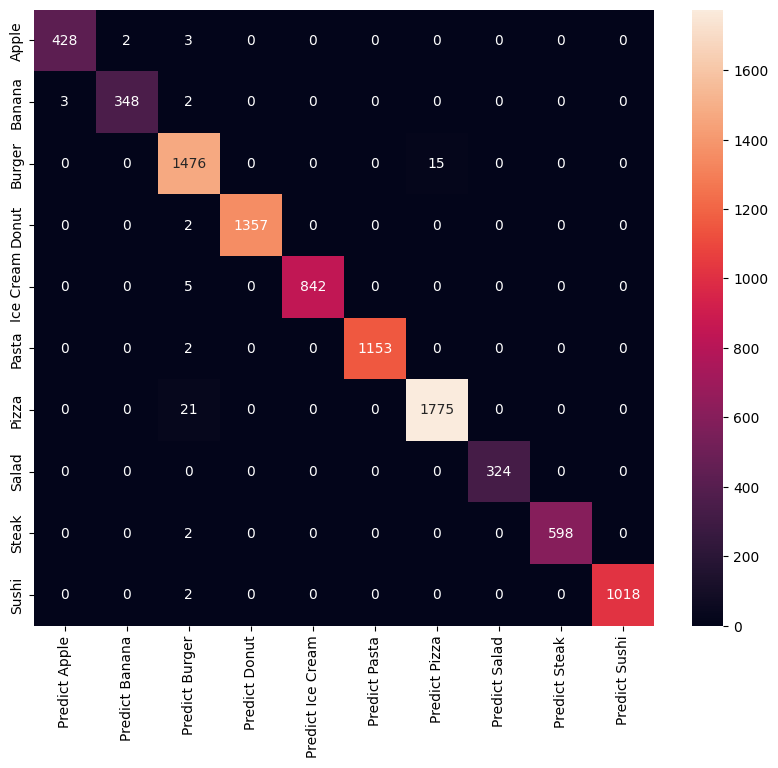

In [161]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=confusion_matrix(y_test, y_predict,labels=[1,2,3,4,5,6,7,8,9,10])

df_cm = pd.DataFrame(cm, index = [i for i in ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']],
                  columns = [i for i in ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi']])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [68]:
##################################

## SVM 

In [162]:
X,y = np.array(a)[ :, 1:16], np.array(a.Food_Name)[:] 

In [163]:
X_train = X[:25000, :]
X_test = X[25001: , :]
y_train = y[:25000]
y_test = y[25001:]

In [164]:
from sklearn import svm

In [165]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) 

In [166]:
clf = svm.SVC(gamma=0.025, C=3)  

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [168]:

clf.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",3
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",0.025
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [169]:
y_pred = clf.predict(X_test)

In [170]:
getAccuracy(y_test , y_pred) 

0.9530276401981147

In [171]:
y_grid = (np.column_stack([y_test, y_pred]))

In [172]:
X_test[:1]

array([[ 3.58155283, 13.58770213, 23.25038087, 14.61167536,  0.61659605,
        66.59771492, 37.41057512, 65.39339161, 40.8673949 , 95.31967789,
         5.        ]])

In [173]:
y_test[:1]

array([5], dtype=int64)

<Axes: >

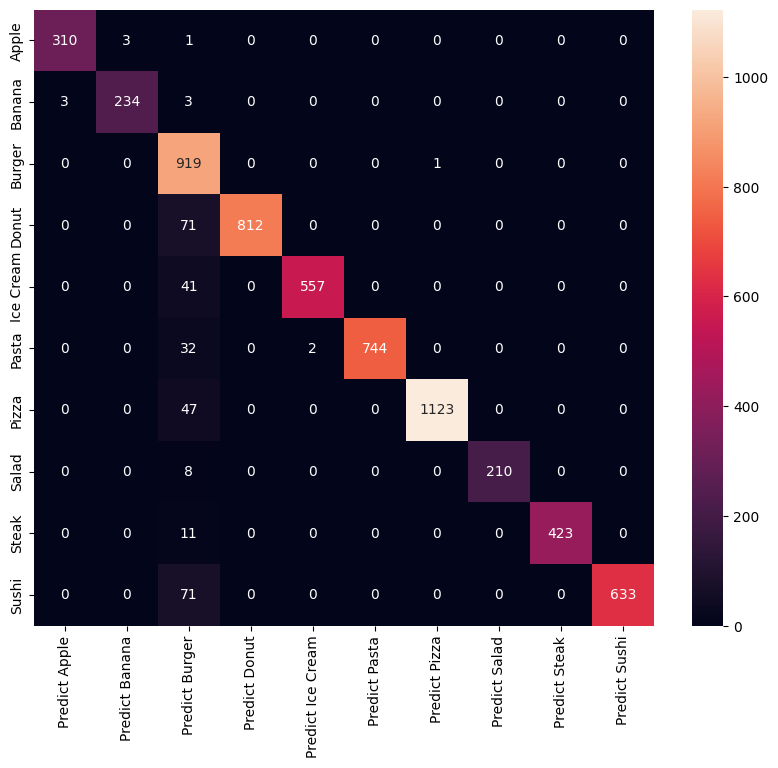

In [174]:
from sklearn import metrics
import seaborn as sns

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5,6,7,8,9,10])

df_cm = pd.DataFrame(cm, index = ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi'],
                  columns = ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi'])

plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True ,fmt='g')

## Logistic Regression

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 1)


In [176]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# fit the model on train

model = LogisticRegression(solver="lbfgs")
model.fit(X_train, y_train)

# predict on test

y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_

print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.081520 -0.096034 -0.094075  0.210530  0.027335  0.005574 -0.122595   
1 -0.027070 -0.079932  0.067956  0.048824 -0.003658 -0.015548 -0.092138   
2  0.066605  0.203897 -0.064736 -0.101421 -0.075280  0.004607  0.318619   
3 -0.042198  0.078599  0.129156  0.175396  0.008443  0.040055  0.036656   
4 -0.048848  0.058320  0.031131  0.207635 -0.014813 -0.018351  0.339016   
5  0.073027  0.089959  0.225059 -0.201482 -0.005669 -0.038579 -0.054821   
6 -0.077173 -0.231365 -0.018805 -0.075005  0.004732  0.015315 -0.404486   
7 -0.008391 -0.010196 -0.161439 -0.119939  0.055173  0.026633 -0.230774   
8  0.087108  0.071553 -0.134082 -0.057062 -0.007023 -0.015512  0.225953   
9  0.058460 -0.084800  0.019833 -0.087476  0.010761 -0.004194 -0.015431   

          7         8         9        10  intercept  
0 -0.367923  0.020197  0.181519 -0.090445  -0.002714  
1  0.200005  0.242931 -0.142311 -0.034215   0.001487  
2 -0.1338

C:\Users\kshan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
model_score = model.score(X_test, y_test)
model_score

0.9870974621454468

<Axes: >

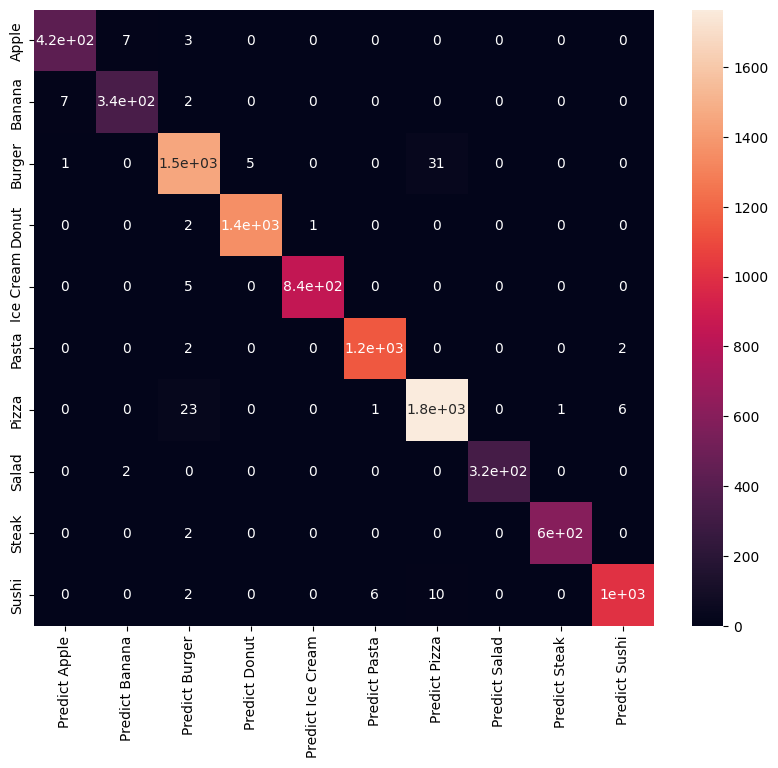

In [178]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,2,3,4,5,6,7,8,9,10])

df_cm = pd.DataFrame(cm, index=[i for i in ['Apple','Banana','Burger','Donut','Ice Cream','Pasta','Pizza','Salad','Steak','Sushi']],
                     columns= [ i for i in ['Predict Apple','Predict Banana','Predict Burger','Predict Donut','Predict Ice Cream','Predict Pasta','Predict Pizza','Predict Salad','Predict Steak','Predict Sushi']])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True)

In [179]:
y_pred = model.predict(X_test)


In [180]:
labels = np.unique(y_test)   # class names
cm = confusion_matrix(y_test, y_pred, labels=labels)


In [181]:
results = []

total_samples = np.sum(cm)

for i, label in enumerate(labels):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = total_samples - (TP + FP + FN)

    results.append([label, TP, FP, FN, TN])


In [182]:
metrics_df = pd.DataFrame(
    results,
    columns=['Class', 'TP', 'FP', 'FN', 'TN']
)

print(metrics_df)


   Class    TP  FP  FN    TN
0      1   423   8  10  8937
1      2   344   9   9  9016
2      3  1454  41  37  7846
3      4  1356   5   3  8014
4      5   842   1   5  8530
5      6  1151   7   4  8216
6      7  1765  41  31  7541
7      8   322   0   2  9054
8      9   598   1   2  8777
9     10  1002   8  18  8350


In [183]:
metrics_df['Precision'] = metrics_df['TP'] / (metrics_df['TP'] + metrics_df['FP'])

metrics_df['Recall'] = metrics_df['TP'] / (metrics_df['TP'] + metrics_df['FN'])

metrics_df['F1_Score'] = 2 * (
    (metrics_df['Precision'] * metrics_df['Recall']) /
    (metrics_df['Precision'] + metrics_df['Recall'])
)

print(metrics_df)


   Class    TP  FP  FN    TN  Precision    Recall  F1_Score
0      1   423   8  10  8937   0.981439  0.976905  0.979167
1      2   344   9   9  9016   0.974504  0.974504  0.974504
2      3  1454  41  37  7846   0.972575  0.975184  0.973878
3      4  1356   5   3  8014   0.996326  0.997792  0.997059
4      5   842   1   5  8530   0.998814  0.994097  0.996450
5      6  1151   7   4  8216   0.993955  0.996537  0.995244
6      7  1765  41  31  7541   0.977298  0.982739  0.980011
7      8   322   0   2  9054   1.000000  0.993827  0.996904
8      9   598   1   2  8777   0.998331  0.996667  0.997498
9     10  1002   8  18  8350   0.992079  0.982353  0.987192


## XG BOOST

In [184]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [185]:
import xgboost as xgb
from xgboost import XGBClassifier

In [186]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_zero = le.fit_transform(y)   # 0–6 (for XGBoost)


In [187]:
X_train, X_test, y_train, y_test = train_test_split(
    x_scaled, y_zero,
    test_size=0.3,
    random_state=1,
    stratify=y_zero
)


In [188]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class= 7, # multiclass classification
    n_estimators=300,
    eval_metric='mlogloss',
    random_state=1
)

model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softmax'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

In [189]:
y_pred_zero = model.predict(X_test)


In [190]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9963744934954148


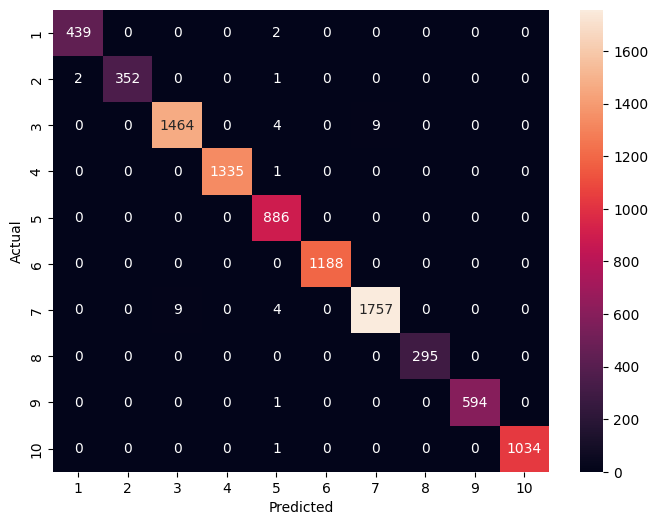

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
